In [1]:
import tensorflow.keras.layers as lyrs
import tensorflow.keras.models as mod
import sklearn.preprocessing as prepro
import numpy
import matplotlib.pyplot as plt
import copy

In [2]:
def load_nasdaq():
    f = open('nasdaq100.csv', 'rb').readlines()[1:]
    raw_max = []
    raw_min = []
    raw_dates = []
    for b_line in f:
        line = b_line.decode("utf-8")
        min_price = float(line.split(',')[3])
        max_price = float(line.split(',')[2])
        raw_min.append(min_price)
        raw_max.append(max_price)
    return raw_max, raw_min

In [3]:
raw_max, raw_min = load_nasdaq()
raw_raw_max = copy.copy(raw_max)
raw_max = prepro.scale(raw_max)
raw_min = prepro.scale(raw_min)
length = len(raw_max)
TRAIN_SIZE = int(length*0.8)

In [4]:
train_min = []
test_min = []
train_target_min = []
test_target_min = []

train_max = []
test_max = []
train_target_max = []
test_target_max = []

In [5]:
for i in range(31, length):
    if i < TRAIN_SIZE:
        train_min.append(raw_min[i-31:i-1])
        train_max.append(raw_max[i-31:i-1])
        train_target_min.append(raw_min[i])
        train_target_max.append(raw_max[i])
    else:
        test_min.append(raw_min[i-31:i-1])
        test_max.append(raw_max[i-31:i-1])
        test_target_min.append(raw_min[i])
        test_target_max.append(raw_max[i])

In [6]:
train_min = numpy.array(train_min)
train_target_min = numpy.array(train_target_min)
test_min = numpy.array(test_min)
test_target_min = numpy.array(test_target_min)

train_max = numpy.array(train_max)
train_target_max = numpy.array(train_target_max)
test_max = numpy.array(test_max)
test_target_max = numpy.array(test_target_max)

In [7]:
model_min = mod.Sequential()
model_min.add(lyrs.Dense(500, input_shape = (30,)))
model_min.add(lyrs.Activation('relu'))
model_min.add(lyrs.Dropout(0.25))
model_min.add(lyrs.Dense(250))
model_min.add(lyrs.Activation('relu'))
model_min.add(lyrs.Dense(1))
model_min.add(lyrs.Activation('linear'))
model_min.compile(optimizer="adam", loss='mse')

In [8]:
model_max = mod.Sequential()
model_max.add(lyrs.Dense(500, input_shape = (30,)))
model_max.add(lyrs.Activation('relu'))
model_max.add(lyrs.Dropout(0.25))
model_max.add(lyrs.Dense(250))
model_max.add(lyrs.Activation('relu'))
model_max.add(lyrs.Dense(1))
model_max.add(lyrs.Activation('linear'))
model_max.compile(optimizer="adam", loss='mse')

In [9]:
history_min = model_min.fit(train_min, 
          train_target_min, 
          epochs=6,
          batch_size = 128, 
          verbose=1, 
          validation_data=(test_min, test_target_min))
score_min = model_min.evaluate(train_min, train_target_min, batch_size=128)
print(score_min)
predicted_min = model_min.predict(test_min)

Epoch 1/6
8/8 [==============================] - 0s 11ms/step - loss: 0.2080 - val_loss: 0.2121
Epoch 2/6
8/8 [==============================] - 0s 4ms/step - loss: 0.0464 - val_loss: 0.0996
Epoch 3/6
8/8 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.0572
Epoch 4/6
8/8 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0300
Epoch 5/6
8/8 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0294
Epoch 6/6
8/8 [==============================] - 0s 750us/step - loss: 0.0048
0.004785377532243729


In [10]:
history_max = model_min.fit(train_max, 
          train_target_max, 
          epochs=6,
          batch_size = 128, 
          verbose=1, 
          validation_data=(test_max, test_target_max))
score_max = model_min.evaluate(train_max, train_target_max, batch_size=128)
print(score_max)
predicted_max = model_min.predict(test_max)

Epoch 1/6
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0462
Epoch 2/6
8/8 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0216
Epoch 3/6
8/8 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0156
Epoch 4/6
8/8 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0157
Epoch 5/6
8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0252
Epoch 6/6
8/8 [==============================] - 0s 686us/step - loss: 0.0026
0.002607835689559579


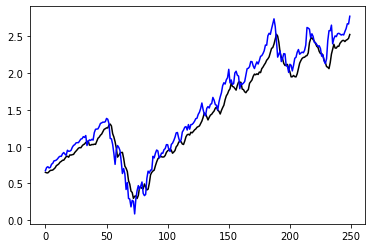

In [11]:
plt.plot(predicted_max[:250], color='black')
plt.plot(test_target_max[:250], color='blue')
plt.show()

In [12]:
balance = 1000.0
actions = 0.0

for i in range(1,len(predicted_max)):
    if predicted_max[i] > test_target_max[i-1]:
        tmp = (1/5)*balance
        balance -= tmp
        actions += tmp/raw_raw_max[TRAIN_SIZE+i-1]
    elif predicted_max[i] < test_target_max[i-1]:
        balance += actions * raw_raw_max[TRAIN_SIZE+i-1]
        actions = 0.0

balance += actions * raw_raw_max[len(raw_raw_max)-1]
actions = 0.0

In [13]:
print("The initial balance was 1000")
print("10 years later :")
print("- With trading algorith the balance would be : ", balance)
print("- With lazy investing, the balance would be : ", 1000*(raw_raw_max[len(raw_raw_max)-1]/raw_raw_max[TRAIN_SIZE]))

The initial balance was 1000
10 years later :
- With trading algorith the balance would be :  1001.4584736272168
- With lazy investing, the balance would be :  1506.866118193139


In [15]:
# Tenter de prédire la valeur exacte ne semble pas être la meilleure approche
# Nous allons tenter une seconde méthode qui consiste à classifier si le marché va monter ou descendre